# 初识数据读取、数据可视化与探索性分析

## 数据读取

我们提供了名为"lq_test.csv"的文件，其中储存着我们建立模型时可能会用到的数据。实际上，要获取股市的数据，你也可以利用**tushare**、**baostock**等等可以免费使用的获取股票数据的接口，当然也可以写个**爬虫**在网上爬取信息，感兴趣的同学可以自己探索。这里我们跳过获取数据的环节，从在本地读取数据开始。

In [1]:
# 导入数据分析库pandas，官方文档https://pandas.pydata.org/docs/
import pandas as pd

# 从本地导入数据，这里用的是相对路径，如果你的程序和文件不在同一个文件夹里请用绝对路径
df = pd.read_csv('lq_test.csv')
# 查看数据
df.head()

,Unnamed: 0,open,close,high,low,volume,money
0,2015-01-05 09:16:00,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-01-05 09:17:00,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-01-05 09:18:00,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-01-05 09:19:00,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-01-05 09:20:00,NaN,NaN,NaN,NaN,NaN,NaN


此时我们的数据已经存储在"df"这个变量中，变量类型为DataFrame。DataFrame是一种表格型数据结构，其中既包含了行索引(index: 0,1,2,...)，又包括了列索引(columns: open, close,...)，我们可以通过索引对表格进行操作。

查看前5行数据后我们发现，数据中有缺测的成分，我们在数据分析和模型建立过程中都不需要这些缺失的部分，因此要将其剔除掉。此外，数据的第一列是时间，我们可以在去掉缺失数据后，把时间单独取出来，以便后续画图、分析时用。

In [2]:
# 剔除缺失数据
df = df.dropna()
df.head()

,Unnamed: 0,open,close,high,low,volume,money
18090,2015-04-16 09:16:00,7672.641,7590.958,7685.313,7533.738,1769.0,2.686149e+09
18091,2015-04-16 09:17:00,7593.381,7577.887,7596.519,7576.192,691.0,1.047675e+09
18092,2015-04-16 09:18:00,7578.020,7532.030,7578.209,7514.106,1059.0,1.595845e+09
18093,2015-04-16 09:19:00,7531.002,7543.151,7552.568,7530.347,681.0,1.027180e+09
18094,2015-04-16 09:20:00,7542.689,7547.992,7549.956,7535.479,498.0,7.512103e+08


现在空值已经被剔除了，但前面的行索引从18090开始，把索引重置：

In [3]:
df = df.reset_index().drop(columns='index')
df.head()

,Unnamed: 0,open,close,high,low,volume,money
0,2015-04-16 09:16:00,7672.641,7590.958,7685.313,7533.738,1769.0,2.686149e+09
1,2015-04-16 09:17:00,7593.381,7577.887,7596.519,7576.192,691.0,1.047675e+09
2,2015-04-16 09:18:00,7578.020,7532.030,7578.209,7514.106,1059.0,1.595845e+09
3,2015-04-16 09:19:00,7531.002,7543.151,7552.568,7530.347,681.0,1.027180e+09
4,2015-04-16 09:20:00,7542.689,7547.992,7549.956,7535.479,498.0,7.512103e+08


其中，reset_index()可以使得索引重置，但原索引会变成名为"index"的新一列，因此我们再用drop()删除之。

那么我们再取出时间：

In [4]:
# 取出时间
raw_time = pd.to_datetime(df.pop('Unnamed: 0'), format='%Y/%m/%d %H:%M')

基本的数据读取就大功告成，接下来我们可以对数据进行简单的探索与分析了！

## 数据可视化&探索性分析

数据可视化是数据初探最直观、便捷的方法。大数据分析中，数据往往存在很多的缺测、异常，通过可视化的手段，可以比较容易的判别出数据的分布、特征、走势、异常类型等众多因素。

在这里为大家简单介绍python中常用的两种可视化工具，分别是**matplotlib**([官方文档](https://matplotlib.org/))与**seaborn**([官方文档](http://seaborn.pydata.org/))。

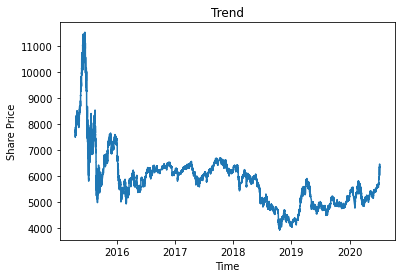

In [6]:
from matplotlib import pyplot as plt
import seaborn as sns

# 折线图：股票走势
plt.plot(raw_time, df['close'])
plt.xlabel('Time')
plt.ylabel('Share Price')
plt.title('Trend')
plt.show()

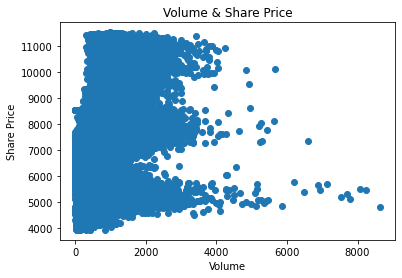

In [7]:
# 散点图：成交量和股价

plt.scatter(df['volume'], df['close'])
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

这个图数据太多了我们，可以选出一部分来看一下：

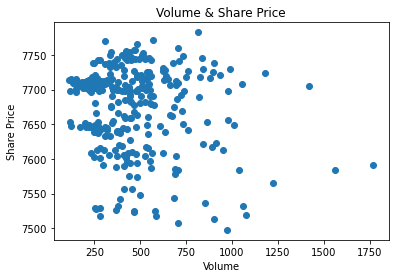

In [8]:
plt.scatter(df['volume'][:300], df['close'][:300])  # 切片，取前300组数据
plt.xlabel('Volume')
plt.ylabel('Share Price')
plt.title('Volume & Share Price')
plt.show()

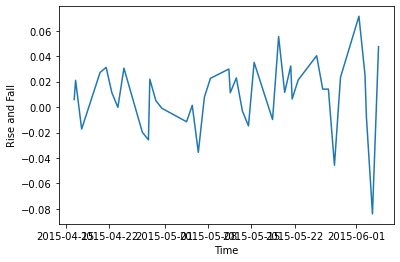

In [9]:
# 涨跌幅度
daily_return = df['close'][0::240].pct_change().dropna()
plt.plot(raw_time[0::240][:40], daily_return[:40])
plt.xlabel('Time')
plt.ylabel('Rise and Fall')
plt.show()

(array([  5.,  11.,  15.,  36., 257., 760., 169.,  33.,   7.,   3.]),
 array([-0.12112817, -0.09842835, -0.07572854, -0.05302873, -0.03032892,
        -0.0076291 ,  0.01507071,  0.03777052,  0.06047033,  0.08317015,
         0.10586996]),
 <BarContainer object of 10 artists>)

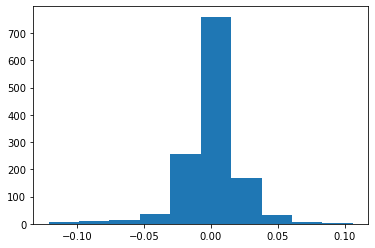

In [10]:
# 直方图
plt.hist(daily_return)

E:\ANACONDA_PYTHON\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


<AxesSubplot:>

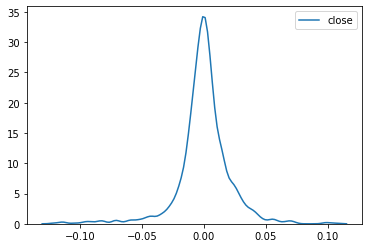

In [11]:
# 核密度估计
sns.kdeplot(daily_return)

In [12]:
# 相关系数矩阵
correlation = df.corr()
print(correlation)

            open     close      high       low    volume     money
open    1.000000  0.999978  0.999985  0.999986  0.288910  0.500360
close   0.999978  1.000000  0.999986  0.999987  0.288924  0.500332
high    0.999985  0.999986  1.000000  0.999971  0.290973  0.502277
low     0.999986  0.999987  0.999971  1.000000  0.286859  0.498399
volume  0.288910  0.288924  0.290973  0.286859  1.000000  0.944984
money   0.500360  0.500332  0.502277  0.498399  0.944984  1.000000


<AxesSubplot:>

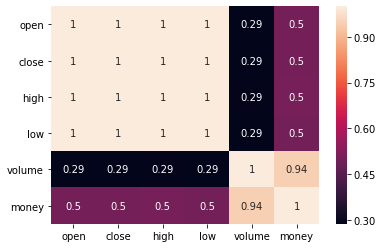

In [13]:
sns.heatmap(correlation, annot=True)

几支股票的对比呢？我们用tushare的接口试一下：

我们随便找几支股票来读数据：

In [14]:
# 注意：tushare需要注册方可使用，注册后初始积分100分，完善个人信息后共120分，才能使用daily()这个api。
# 尽管tushare的绝大多数api我们都没有使用权限，但daily()和cctv_news()应当可以满足本次训练营的使用。
# 初次使用需要初始化一次

import tushare as ts

token = 'c3a77cb99733084fb6d9bfd7a7fb416b2155b7bdade46c78e752e730'  # 我自己注册的token，大家最好还是自己注册一个，数据调用有上限
ts.set_token(token)  # 初始化，之后就不需要了

pro = ts.pro_api()

df = pro.daily(ts_code='000001.SZ, 000002.SZ, 000004.SZ, 000005.SZ, 000006.SZ', start_date='20200201', end_date='20200601') #  000003.SZ已经退市
df.head(10)

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
0,000001.SZ,20200601,13.10,13.39,13.08,13.32,13.00,0.32,2.4615,882960.55,1173619.006
1,000002.SZ,20200601,25.98,26.50,25.98,26.40,25.70,0.70,2.7237,779004.22,2049366.265
2,000004.SZ,20200601,29.01,29.75,28.59,29.38,28.88,0.50,1.7313,26699.33,77991.672
3,000005.SZ,20200601,2.56,2.62,2.55,2.61,2.57,0.04,1.5564,61439.75,15960.243
4,000006.SZ,20200601,4.85,4.89,4.82,4.87,4.81,0.06,1.2474,116589.79,56691.719
5,000001.SZ,20200529,13.01,13.04,12.92,13.00,13.07,-0.07,-0.5356,457808.22,594502.123
6,000002.SZ,20200529,26.12,26.12,25.70,25.70,26.14,-0.44,-1.6832,520783.50,1345961.672
7,000004.SZ,20200529,28.28,29.22,28.28,28.88,28.79,0.09,0.3126,16543.50,47665.027
8,000005.SZ,20200529,2.57,2.57,2.54,2.57,2.57,0.00,0.0000,24413.00,6246.953
9,000006.SZ,20200529,4.79,4.89,4.77,4.81,4.81,0.00,0.0000,77826.85,37452.963


可以看到几支股票的时间和序号都混杂在一起，不太方便我们画图，先分个类：

In [15]:
sz1 = df[::5].set_index('trade_date')
sz2 = df[1::5].set_index('trade_date')
sz4 = df[2::5].set_index('trade_date')
sz5 = df[3::5].set_index('trade_date')
sz6 = df[4::5].set_index('trade_date')

sz1.head()

,ts_code,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,
20200601,000001.SZ,13.10,13.39,13.08,13.32,13.00,0.32,2.4615,882960.55,1173619.006
20200529,000001.SZ,13.01,13.04,12.92,13.00,13.07,-0.07,-0.5356,457808.22,594502.123
20200528,000001.SZ,12.87,13.18,12.81,13.07,12.78,0.29,2.2692,960760.31,1255226.999
20200527,000001.SZ,13.05,13.19,12.96,13.00,13.04,-0.04,-0.3067,482962.94,630305.864
20200526,000001.SZ,13.02,13.07,12.94,13.04,12.96,0.08,0.6173,396212.40,515451.849


把股票都分出来了开始画图：

E:\ANACONDA_PYTHON\lib\site-packages\pandas\plotting\_matplotlib\core.py:1192: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


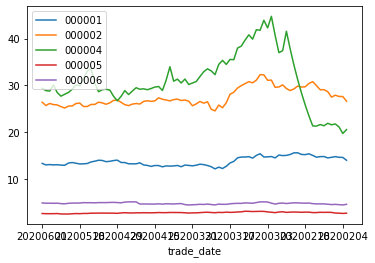

In [16]:
fig, ax = plt.subplots()

sz1.plot(ax=ax, y='close', label='000001')
sz2.plot(ax=ax, y='close', label='000002')
sz4.plot(ax=ax, y='close', label='000004')
sz5.plot(ax=ax, y='close', label='000005')
sz6.plot(ax=ax, y='close', label='000006')

plt.legend(loc='upper left')

再利用柱状图看一下平均股价如何：

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, '000001'),
  Text(1, 0, '000002'),
  Text(2, 0, '000004'),
  Text(3, 0, '000005'),
  Text(4, 0, '000006')])

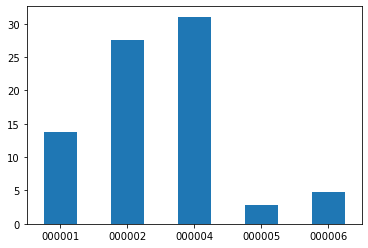

In [17]:
mean_share_list = [sz1['close'].mean(), sz2['close'].mean(), sz4['close'].mean(), sz5['close'].mean(), sz6['close'].mean()]
mean_share_series = pd.Series(mean_share_list, index=['000001', '000002', '000004', '000005', '000006'])
mean_share_series.plot(kind='bar')
plt.xticks(rotation=360)  # 这里如果不加rotation默认是90°

再画个箱形图？

<AxesSubplot:>

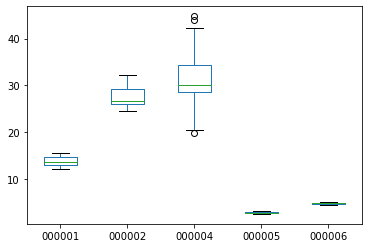

In [18]:
closedf = pd.DataFrame()
closedf = pd.concat([closedf, sz1['close'], sz2['close'], sz4['close'], sz5['close'], sz6['close']], axis=1)  # 横向拼接数据(axis=1)
closedf.columns = ['000001', '000002', '000004', '000005', '000006']
closedf.plot(kind='box')

000004出现了几个“O”，在箱形图中“O”表示温和的异常值，“\*”表示极端的异常值。

箱形图中异常值的判断来自上下四分位数(Q1, Q3)与四分位距(IQR = Q3 - Q1)，并认为小于Q1-1.5IQR或大于Q3+1.5IQR的为异常值。

对数据的均值、分位数、标准差、最值等进行初步分析可以使用describe()方法：

In [19]:
sz4.describe()

,open,high,low,close,pre_close,change,pct_chg,vol,amount
count,82.000000,82.000000,82.000000,82.000000,82.000000,82.00000,82.000000,82.000000,8.200000e+01
mean,31.028293,32.042805,30.038659,31.067805,30.987805,0.08000,0.432017,52569.611463,1.825610e+05
std,5.926845,6.385712,5.413769,5.811248,5.879523,1.62539,5.042031,49891.584767,2.086545e+05
min,18.510000,20.100000,18.510000,19.730000,19.730000,-4.16000,-10.004800,4300.000000,8.832200e+03
25%,28.430000,29.205000,27.762500,28.537500,28.485000,-0.84750,-2.745875,24400.367500,6.847437e+04
50%,29.820000,30.925000,28.990000,30.120000,30.120000,-0.15000,-0.621400,32798.565000,9.973619e+04
75%,34.405000,34.972500,33.247500,34.267500,34.267500,0.84750,2.909125,62764.540000,2.043633e+05
max,48.000000,49.000000,42.630000,44.770000,44.770000,4.07000,10.012800,279365.390000,1.111662e+06


怎么样，是不是很简单？接下来我们来玩一个稍微难一点点的，来绘制一张k线图：

## 数据可视化&探索性分析——进阶

绘制k线图我们采用mplfinance中的candlestick_ochl()方法，以日k线为例，我们要准备的数据有(time, open, close, high, low)。其中，time为每日的日期，open，close，high，low分别为每日开盘、收盘、最高、最低价。

值得一提的是，股市的开、收盘时间分别为上午9:30以及下午15:00，而根据之前查看的结果，存在着在该时间范围外的数据，应首先剔除之。

为保证程序的完整性，避免大家忘记，这里我们从头开始。

In [20]:
# 导入必要库
import pandas as pd  # 数据处理
import datetime  # 时间格式处理
from matplotlib.pylab import date2num  # 时间格式处理
from matplotlib import pyplot as plt  # 绘图
from mplfinance.original_flavor import candlestick_ochl  # 绘制k线图
from matplotlib import ticker as mticker  # 刻度处理
from matplotlib import dates as mdates  # 时间格式处理

data = pd.read_csv('lq_test.csv')
data = data.dropna().reset_index().drop(columns='index')
raw_time = data.pop('Unnamed: 0')

首先我们要把开盘时间外的时间剔除掉。为此首先要把日期和时间分隔开来，并把时间的格式改成方便比较的形式。

In [22]:
date_times = []
dates = []
times = []
date_time_format = '%Y-%m-%d %H:%M:%S'  # 原str中的日期-时间格式
date_format = '%Y-%m-%d'  # 待转日期格式
time_format = '%H:%M:%S'  # 待转时间格式

# 将str转为datetime.datetime
for i in raw_time:
    date_times.append(datetime.datetime.strptime(i, date_time_format))

# 将日期与时间拆开，且此时的日期与时间的类型又变成str
for date_time in date_times:
    dates.append(date_time.strftime(date_format))
    times.append(date_time.strftime(time_format))

# 把分离并调整格式的日期和时间储存在data中
data['date'] = dates
data['time'] = times
data_ = data.copy()  # 为避免污染源数据，将数据拷贝至新的DataFrame中进行处理，copy()方法默认深拷贝，之后我们还会提到这个概念

上述将str转为datetime.datetime有两个目的，一是将日期与时间分开，二是调整时间格式，方便后续比较。我自己用pycharm读出的日期时间格式为

    date_time_format = '%Y/%m/%d %H:%M'  # 如：2015/4/16 9:16

但在本notebook中，时间格式已经为方便比较的形式，因此可以简化操作，直接分割文本：

    for i in raw_time:
        a, b = i.split(' ')
        dates.append(a)
        times.append(b)
        
接下来我们把非开盘时间的数据剔除掉：

In [23]:
data_.drop(data_[(data_.time < '09:31:00') | (data_.time > '15:00:00')].index, inplace=True)  # 把非开盘时间通过字符串比较大小去除
data_ = data_.reset_index().drop(columns='index')
data_.head()

,open,close,high,low,volume,money,date,time
0,7528.648,7535.990,7559.214,7526.845,850.0,1.282620e+09,2015-04-16,09:31:00
1,7534.812,7524.653,7536.748,7521.765,466.0,7.016898e+08,2015-04-16,09:32:00
2,7526.042,7527.767,7533.067,7525.457,260.0,3.914168e+08,2015-04-16,09:33:00
3,7526.642,7528.800,7530.825,7523.430,251.0,3.778643e+08,2015-04-16,09:34:00
4,7529.424,7529.753,7532.072,7524.945,279.0,4.202058e+08,2015-04-16,09:35:00


此处比较的并非是时间，而是字符串。

字符串的大小规则为，从第一个元素开始比较大小，大小相同则继续比较第二个，以此类推。如果之前的时间格式为‘%H:%M’(如9:16)，比较大小的时候就会因为'9' > '1'，导致9点后的所有时间都比9点小。因此要转格式后再进行字符串的比较。

当然上面两种并非唯二的也可能不是最优的方法，大家有什么更好的思路也可以自己尝试。

现在把需要的数据提取出来：

In [24]:
Open = data_['open'][0::240].reset_index().drop(columns='index')
Close = data_['close'][239::240].reset_index().drop(columns='index')

以open为例，取出data_中的'open'列，按\[start:end:step\]对数据进行切片。每日的开盘价为每日首个open值，收盘价为每日最后的close值。每天开盘时间为240分钟，设步长240，open和close切片的起点分别为0与239，直至数据最末。

In [25]:
High = data_[['high', 'date']].groupby('date').max().reset_index()
Low = data_[['low', 'date']].groupby('date').min().reset_index()
Dates = High['date']

high和low分别是每天的最高最低价，利用groupby()方法，把数据按日期分类，并取出最大、最小值。注意到又进行了reset_index()，是方便直接取出日期备用。

candlestick_ochl()对时间格式有要求，进行转换：

In [26]:
plot_dates = []
for Date in Dates:
    plot_date = datetime.datetime.strptime(Date, date_format)  # 先把日期格式转回datetime.datetime以满足date2num()的类型要求
    plot_dates.append(date2num(plot_date))

In [27]:
plot_mat = pd.DataFrame()
plot_mat['time'] = plot_dates
plot_mat['open'] = Open
plot_mat['close'] = Close
plot_mat['high'] = High['high']
plot_mat['low'] = Low['low']
plot_mat.head()

,time,open,close,high,low
0,16541.0,7528.648,7644.399,7784.564,7515.157
1,16542.0,7651.735,7744.141,7891.666,7644.474
2,16545.0,7655.134,7574.491,7801.369,7558.812
3,16546.0,7628.847,8062.652,8091.294,7616.232
4,16547.0,8117.878,8190.242,8219.138,8089.996


准备就绪，可以画图了！

先给大家看一下成品图(๑•̀ㅂ•́)و✧

![Figure_1.png](Figure_1.png)

要画出上面的成品图，首先是简约线条.jpg

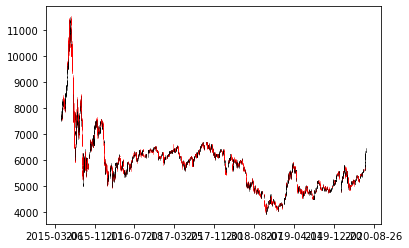

In [28]:
fig, ax = plt.subplots()
candlestick_ochl(ax, plot_mat.values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

太密集看不清，我们取个局部看看（后面都取局部了，大家也可以自己选想画的范围）

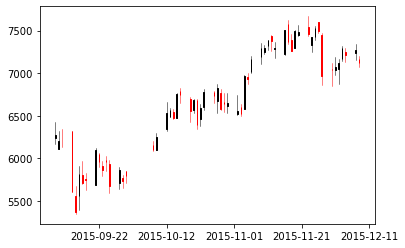

In [29]:
fig, ax = plt.subplots()
candlestick_ochl(ax, plot_mat[100:160].values)
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.show()

让我们加入亿点细节：

PS:接下来每次添加内容都会把原有的绘图代码重写一遍，要看新内容请直接移步至有**注释**处！

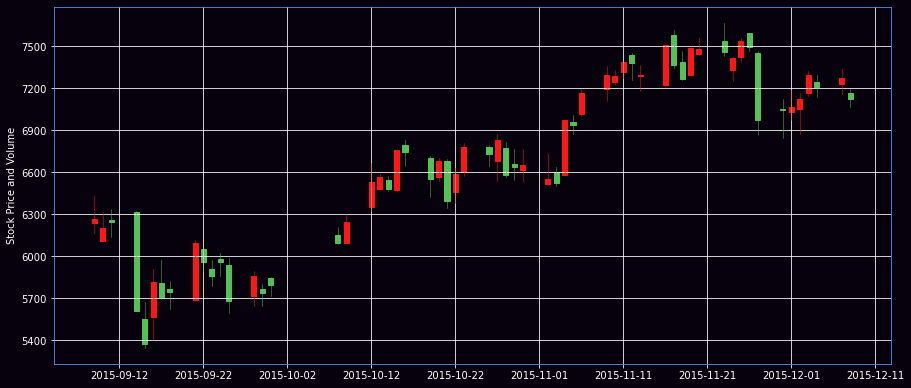

In [30]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))  # 设置画布背景颜色与画布大小
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')  

'''
参数分别为：shape，location，rowspan，colspan

shape设置网格布局，(6, 4)即6行4列，location设置起始画图位置，rowspan与colspan分别代表图形在行列上的跨度

这里k线图从第2行，第1列起画，占4行4列

之所以设置6行，是因为还有两个子图分别在上下(第1行和第6行)，可以见成品图

'''
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')  # 设置线宽与涨跌颜色
ax.grid(True, color='w')  # 设置网格及其颜色(白色)
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))  # 设置横轴刻度，MaxNLocator确定最多显示多少个刻度
ax.yaxis.set_major_locator(mticker.MaxNLocator())  # 设置纵轴刻度，不填参数则MaxNLocator自动
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))  # 设置横轴显示为时间
ax.yaxis.label.set_color('w')  # 设置y轴标签的颜色(白色)
ax.spines['bottom'].set_color('#5998ff')  # 设置底部轴颜色
ax.spines['top'].set_color('#5998ff')  # 设置顶部轴颜色
ax.spines['left'].set_color('#5998ff')  # 设置左轴颜色
ax.spines['right'].set_color('#5998ff')  # 设置右轴颜色
ax.tick_params(axis='y', colors='w')  # 设置y轴刻度颜色
ax.tick_params(axis='x', colors='w')  # 设置x轴刻度颜色
plt.ylabel('Stock Price and Volume', color='w')  # y轴标签
plt.show()

对比成品图，还有一些部件没有画。我们首先来画离k线最近的两条线——移动平均线。

移动平均线，Moving Average，简称MA，MA是用统计分析的方法，将一定时期内的证券价格（指数）加以平均，并把不同时间的平均值连接起来，形成一根MA，用以观察证券价格变动趋势的一种技术指标。

以10日平均线和30日平均线为例：

In [31]:
mov_avg_ten = plot_mat['close'].rolling(window=10).mean() # 计算每10天收盘价的均值，每次向下滚动1天
mov_avg_thirty = plot_mat['close'].rolling(window=30).mean()  # 计算每30天收盘价的均值，每次向下滚动1天

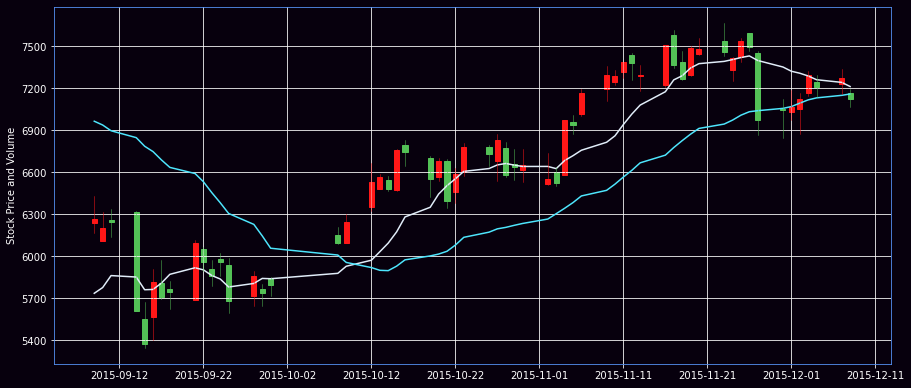

In [32]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')

# 绘制10日与30日均线
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)

candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
plt.show()

接下来是下面蓝色的成交量线。

成交量线即每日成交量和连接而成的曲线。

好简单😂

那么和刚刚计算最大、最小值的方法类似，同样groupby()之后sum()就可以了！

In [33]:
Volume = data_[['date', 'volume']].groupby(by='date').sum().reset_index()

成交量线本质上是子图，但它与k线、移动平均线共用x轴

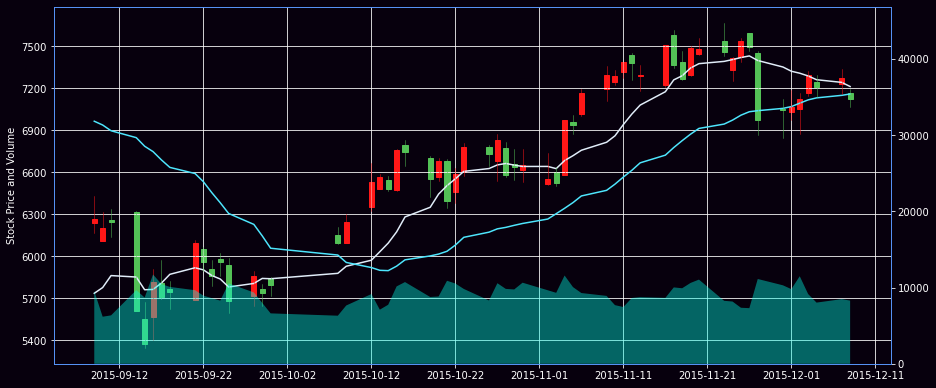

In [34]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')


# 绘制成交量图
ax_ = ax.twinx()  # 共享绘图区域
ax_.fill_between(plot_mat.time[100:160].values, 0, Volume.volume[100:160].values,
                facecolor='#00ffe8', alpha=0.4)  # 把[0, volume]之间空白填充颜色，alpha设置透明度
ax_.grid(False)  # 不显示成交量的网格
ax_.set_ylim(0, 4*Volume.volume.values[100:160].max())  # 成交量的y轴范围，为使成交量线处在较下方，设置刻度最大值为成交量最大值的四倍
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')

plt.show()

接下来我们来绘制上下的子图。

上图为RSI(Relative Strength Index，相对强弱指标)，是根据一定时期内上涨点数和下跌点数之和的比率制作出的一种技术曲线。能够反映出市场在一定时期内的景气程度。该分析指标的设计是以三条线来反映价格走势的强弱，这种图形可以为投资者提供操作依据，非常适合做短线差价操作。

RSI的原理简单来说是以数字计算的方法求出买卖双方的力量对比，譬如有100个人面对一件商品，如果50个人以上要买，竞相抬价，商品价格必涨。相反，如果50个人以上争着卖出，价格自然下跌。


强弱指标理论认为，任何市价的大涨或大跌，均在0-100之间变动，根据常态分配，认为RSI值多在30-70之间变动，通常80甚至90时被认为市场已到达超买状态，至此市场价格自然会回落调整。当价格低跌至30以下即被认为是超卖状态，市价将出现反弹回升。

RSI的计算如下：

RSI=100×RS/(1+RS) 或者,RSI=100－100÷(1+RS)

RS=X天的平均上涨点数/X天的平均下跌点数

一般的RSI周期为6日，12日，24日。

In [35]:
def cal_rsi(df0, period=6):  # 默认周期为6日
    df0['diff'] = df0['close'] - df0['close'].shift(1)  # 用diff储存两天收盘价的差
    df0['diff'].fillna(0, inplace=True)  # 空值填充为0
    df0['up'] = df0['diff']  # diff赋值给up
    df0['down'] = df0['diff']  # diff赋值给down
    df0['up'][df0['up'] < 0] = 0  # 把up中小于0的置零
    df0['down'][df0['down'] > 0] = 0  # 把down中大于0的置零
    df0['avg_up'] = df0['up'].rolling(period).sum() / period  # 计算period天内平均上涨点数
    df0['avg_down'] = abs(df0['down'].rolling(period).sum() / period)  # 计算period天内评价下跌点数
    df0['avg_up'].fillna(0, inplace=True)  # 空值填充为0
    df0['avg_down'].fillna(0, inplace=True)  # 空值填充为0
    df0['rsi'] = 100 - 100 / (1 + (df0['avg_up'] / df0['avg_down']))  # 计算RSI
    return df0  # 返回原DataFrame

In [36]:
plot_mat = cal_rsi(plot_mat)

[]

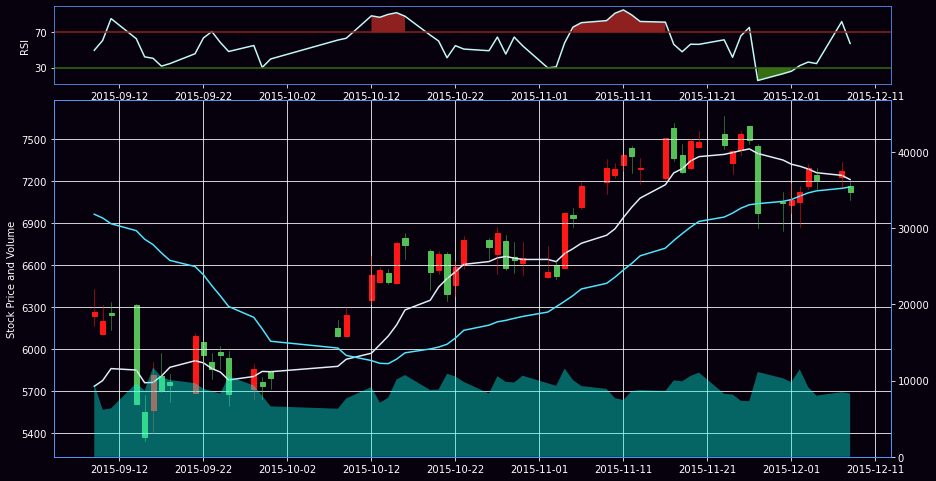

In [37]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[100:160].values, 0, Volume.volume[100:160].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[100:160].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')

# 绘制RSI曲线

ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')  # 第1行第1列起画，占1行4列
col_rsi = '#c1f9f7'  # RSI曲线的颜色
col_pos = '#8f2020'  # 上辅助线及其填充色
col_neg = '#386d13'  # 下辅助线及其填充色
ax0.plot(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, col_rsi, linewidth=1.5)  # RSI曲线及其颜色，线宽
ax0.axhline(70, color=col_pos)  # 上辅助线及其颜色
ax0.axhline(30, color=col_neg)  # 下辅助线及其颜色
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 70, where=(plot_mat.rsi.values[100:160] >= 70),
                 facecolors=col_pos)  # 把RSI曲线大于等于70的部分填充为红色
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 30, where=(plot_mat.rsi.values[100:160] <= 30),
                 facecolors=col_neg)  # 把RSI曲线小于等于30的部分填充为绿色
ax0.set_yticks([30, 70])  # 设置辅助线的刻度
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')

plt.plot()

最后是最下面的子图：MACD线

MACD(Moving Average Convergence / Divergence，异同移动平均线)是从双指数移动平均线发展而来的，由快的指数移动平均线（EMA12）减去慢的指数移动平均线（EMA26）得到快线DIF，再用2×（快线DIF-DIF的9日加权移动均线DEA）得到MACD柱。MACD的意义和双移动平均线基本相同，即由快、慢均线的离散、聚合表征当前的多空状态和股价可能的发展变化趋势，但阅读起来更方便。MACD的变化代表着市场趋势的变化，不同K线级别的MACD代表当前级别周期中的买卖趋势。

MACD在应用上应先行计算出快速（一般选12日）移动平均值与慢速（一般选26日）移动平均值。以这两个数值作为测量两者（快速与慢速线）间的“差离值”依据。所谓“差离值”（DIF），即12日EMA数值减去26日EMA数值。因此，在持续的涨势中，12日EMA在26日EMA之上。其间的正差离值（+DIF）会愈来愈大。反之在跌势中，差离值可能变负（-DIF），此时是绝对值愈来愈大。至于行情开始回转，正或负差离值要缩小到一定的程度，才真正是行情反转的信号。MACD的反转信号界定为“差离值”的9日移动平均值（9日DIF）。 在MACD的异同移动平均线计算公式中，都分别加T+1交易日的份量权值，以现在流行的参数12和26为例，其公式如下：

首先计算出快速移动平均线（即EMA1）和慢速移动平均线（即EMA2），以此两个数值，来作为测量两者（快慢速线）间的离差值（DIF）的依据，然后再求DIF的N周期的平滑移动平均线DEA（也叫MACD、DEM）线。

以EMA1的参数为12日EMA2的参数为26日，DIF的参数为9日为例来看看MACD的计算过程

1、计算移动平均值（EMA）

12日EMA的算式为

EMA（12）=前一日EMA（12）×11/13+今日收盘价×2/13

26日EMA的算式为

EMA（26）=前一日EMA（26）×25/27+今日收盘价×2/27

2、计算离差值（DIF）

DIF=今日EMA（12）－今日EMA（26）

3、计算DIF的9日EMA

根据离差值计算其9日的EMA，即离差平均值，是所求的MACD值。为了不与指标原名相混淆，此值又名DEA或DEM。

今日DEA（MACD）=前一日DEA×8/10+今日DIF×2/10。

计算出的DIF和DEA的数值均为正值或负值。

用（DIF-DEA）×2即为MACD柱状图。

EMA的计算如下：

![ema.svg](ema.svg)

In [38]:
def cal_ema(df0, period, is_dea=False):  # DEA与EMA的计算方式相同，封装在同一个函数中，用is_dea来确认是否是DEA
    for i in range(len(df0)):
        if not is_dea:
            if i == 0:
                df0.loc[i, 'ema'+str(period)] = df0.loc[i, 'close']  # EMA初始值为当天收盘价
            else:
                df0.loc[i, 'ema'+str(period)] = (2*df0.loc[i, 'close']+(period-1)*df0.loc[i-1, 'ema'+str(period)])/(period+1)  # 按公式计算
            ema = df0['ema'+str(period)]
        else:
            if i == 0:
                df0.loc[i, 'dea'+str(period)] = df0.loc[i, 'dif']
            else:
                df0.loc[i, 'dea'+str(period)] = ((period-1)*df0.loc[i-1, 'dea'+str(period)]+2*df0.loc[i, 'dif']) / (period+1)
            ema = df0['dea'+str(period)]
    return ema

In [39]:
def cal_macd(df0, short=12, long=26, m=9):
    short_ema = cal_ema(df0, short)  # 计算12日EMA
    long_ema = cal_ema(df0, long)  # 计算26日EMA
    df0['dif'] = short_ema - long_ema  # 计算DIF
    dea = cal_ema(df0, m, is_dea=True)  # 计算DEA
    df0['macd'] = 2 * (df0['dif'] - df0['dea'+str(m)])  # 计算MACD
    return df0

在cal_ema()中，之所以要在命名后面加一个'+str(period)'，是因为python中的赋值默认为浅拷贝，只复制指向某个对象的指针，而不复制值。我们在cal_macd()中，分别计算了两次ema，如果不加'+str(period)'，则第二次调用cal_ema()赋值给long_ema()时，由于新计算的ema覆盖了原来的，而short_ema的指针没有变化，导致short_ema的值与long_ema相同，则后面计算dif对二值做差得到的结果必然为0。

In [40]:
plot_mat = cal_macd(plot_mat)

[]

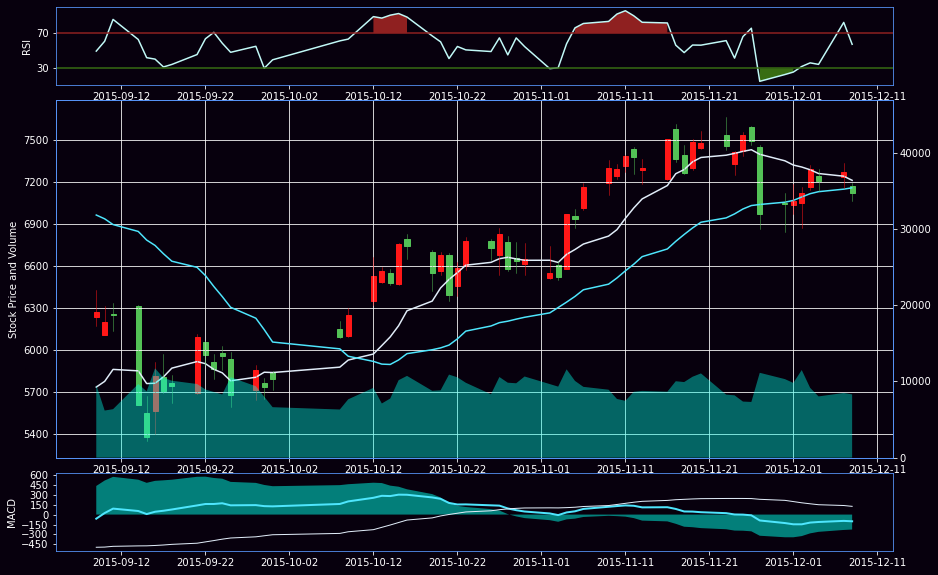

In [41]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[100:160].values, 0, Volume.volume[100:160].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[100:160].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')
ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
col_rsi = '#c1f9f7'
col_pos = '#8f2020'
col_neg = '#386d13'
ax0.plot(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, col_rsi, linewidth=1.5)
ax0.axhline(70, color=col_pos)
ax0.axhline(30, color=col_neg)
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 70, where=(plot_mat.rsi.values[100:160] >= 70),
                 facecolors=col_pos)
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 30, where=(plot_mat.rsi.values[100:160] <= 30),
                 facecolors=col_neg)
ax0.set_yticks([30, 70])
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')

# 绘制MACD线
ax1 = plt.subplot2grid((6, 4), (5, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d') # 第6行第1列起，占1行4列
ax1.plot(plot_mat.time[100:160].values, plot_mat.macd[100:160].values, color='#4ee6fd', linewidth=2)  # MACD线
ax1.plot(plot_mat.time[100:160].values, plot_mat.dea9[100:160].values, color='#e1edf9', linewidth=1)  # DEA线
ax1.fill_between(plot_mat.time[100:160].values, plot_mat.macd[100:160].values-plot_mat.dea9[100:160].values, 0,
                 alpha=0.5, facecolors='#00ffe8')  # 填充差值
ax1.yaxis.set_major_locator(mticker.MaxNLocator())  # 设置纵坐标
ax1.spines['bottom'].set_color('#5998ff')
ax1.spines['top'].set_color('#5998ff')
ax1.spines['left'].set_color('#5998ff')
ax1.spines['right'].set_color('#5998ff')
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
plt.ylabel('MACD', color='w')

plt.plot()

不难发现横坐标出现了三次，我们做一下最后的调整：

[]

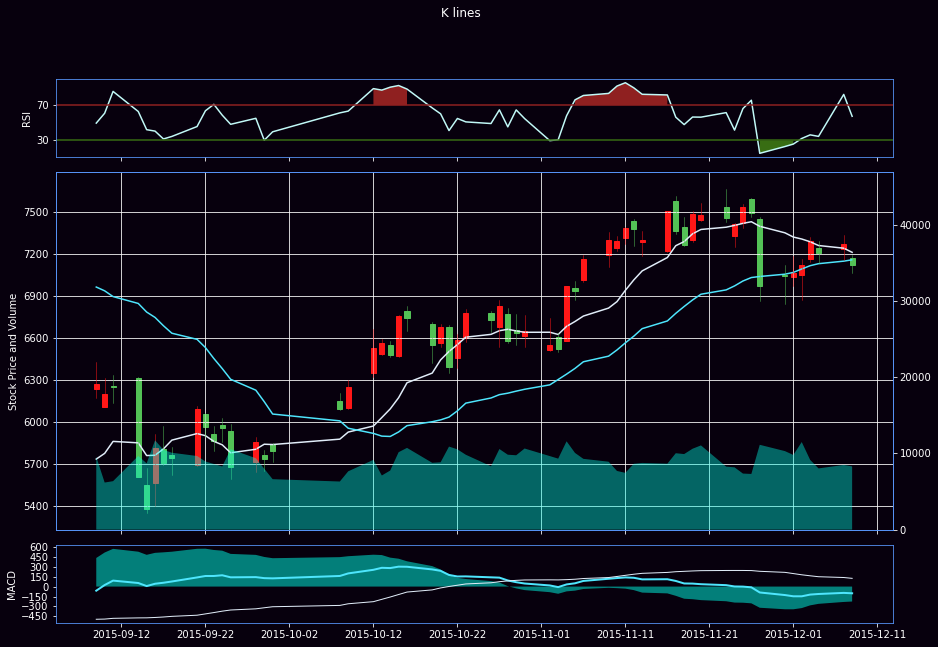

In [42]:
fig = plt.figure(facecolor='#07000d', figsize=(15, 10))
ax = plt.subplot2grid((6, 4), (1, 0), rowspan=4, colspan=4, facecolor='#07000d')
ax.plot(plot_mat.time[100:160].values, mov_avg_ten[100:160], '#e1edf9', label='10days', linewidth=1.5)  
ax.plot(plot_mat.time[100:160].values, mov_avg_thirty[100:160], '#4ee6fd', label='10days', linewidth=1.5)
candlestick_ochl(ax, plot_mat[100:160].values, width=0.6, colorup='#ff1717', colordown='#53c156')
ax.grid(True, color='w')
ax.xaxis.set_major_locator(mticker.MaxNLocator(10))
ax.yaxis.set_major_locator(mticker.MaxNLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.yaxis.label.set_color('w')
ax.spines['bottom'].set_color('#5998ff')
ax.spines['top'].set_color('#5998ff')
ax.spines['left'].set_color('#5998ff')
ax.spines['right'].set_color('#5998ff')
ax.tick_params(axis='y', colors='w')
ax.tick_params(axis='x', colors='w')
plt.ylabel('Stock Price and Volume', color='w')
ax_ = ax.twinx()
ax_.fill_between(plot_mat.time[100:160].values, 0, Volume.volume[100:160].values,
                facecolor='#00ffe8', alpha=0.4)
ax_.grid(False)
ax_.set_ylim(0, 4*Volume.volume[100:160].values.max())
ax_.spines['bottom'].set_color('#5998ff')
ax_.spines['top'].set_color('#5998ff')
ax_.spines['left'].set_color('#5998ff')
ax_.spines['right'].set_color('#5998ff')
ax_.tick_params(axis='y', colors='w')
ax_.tick_params(axis='x', colors='w')
ax0 = plt.subplot2grid((6, 4), (0, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
col_rsi = '#c1f9f7'
col_pos = '#8f2020'
col_neg = '#386d13'
ax0.plot(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, col_rsi, linewidth=1.5)
ax0.axhline(70, color=col_pos)
ax0.axhline(30, color=col_neg)
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 70, where=(plot_mat.rsi.values[100:160] >= 70),
                 facecolors=col_pos)
ax0.fill_between(plot_mat.time[100:160].values, plot_mat.rsi[100:160].values, 30, where=(plot_mat.rsi.values[100:160] <= 30),
                 facecolors=col_neg)
ax0.set_yticks([30, 70])
ax0.spines['bottom'].set_color("#5998ff")
ax0.spines['top'].set_color("#5998ff")
ax0.spines['left'].set_color("#5998ff")
ax0.spines['right'].set_color("#5998ff")
ax0.tick_params(axis='x', colors='w')
ax0.tick_params(axis='y', colors='w')
plt.ylabel('RSI', color='w')
ax1 = plt.subplot2grid((6, 4), (5, 0), sharex=ax, rowspan=1, colspan=4, facecolor='#07000d')
ax1.plot(plot_mat.time[100:160].values, plot_mat.macd[100:160].values, color='#4ee6fd', linewidth=2)
ax1.plot(plot_mat.time[100:160].values, plot_mat.dea9[100:160].values, color='#e1edf9', linewidth=1)
ax1.fill_between(plot_mat.time[100:160].values, plot_mat.macd[100:160].values-plot_mat.dea9[100:160].values, 0,
                 alpha=0.5, facecolors='#00ffe8')
ax1.yaxis.set_major_locator(mticker.MaxNLocator())
ax1.spines['bottom'].set_color('#5998ff')
ax1.spines['top'].set_color('#5998ff')
ax1.spines['left'].set_color('#5998ff')
ax1.spines['right'].set_color('#5998ff')
ax1.tick_params(axis='y', colors='w')
ax1.tick_params(axis='x', colors='w')
plt.ylabel('MACD', color='w')

plt.setp(ax.get_xticklabels(), visible=False)  # 隐藏ax的x轴
plt.setp(ax0.get_xticklabels(), visible=False)  # 隐藏ax0的x轴
plt.suptitle('K lines', color='w')  # 绘制标题
plt.plot()

大功告成啦！

最后留下一个小问题给同学们思考：

上面绘制的k线虽然看上去很高端，但节假日和周六周末不开盘的时候因为没有数据导致了k线空白而不连续。我们要如何去掉k线中的空白使之连续呢？